# Python Project
Krystian Potępa 136100

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn' <- This is a code for ignoring warnings

#1. Read the data and view it.

df=pd.read_csv('Data Analysis Mini-project/amazon.csv', sep=',',encoding='latin1' , na_filter=True)
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [2]:
#2. The months in the column “month” are in Portuguese. Change them to English.

df['month']
monthsP = [
           df['month'] == 'Janeiro',df['month'] == 'Fevereiro',df['month'] == 'Março',df['month'] == 'Abril', 
           df['month'] == 'Maio',df['month'] == 'Junho',df['month'] == 'Julho',df['month'] == 'Agosto',
           df['month'] == 'Setembro',df['month'] == 'Outubro',df['month'] == 'Novembro',df['month'] == 'Dezembro'
          ]
monthsE =['January','February','March','April','May','June','July','August','September','October','November','Decmber']

df['month'] = np.select(monthsP, monthsE)
df.head(5)

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [3]:
#3. Missing values in the state column:
# a- Randomly delete 200 values from the state column;
# b- Check for the missing values in this column;
# c- Fill each missing value with that of the previous (or next) row.

i = 0; t = []
state = df['state']
while i<200:
    A = np.random.randint(len(state))
    if not pd.isna(state.loc[A]):
        state.loc[A] = np.NaN
        i+=1
        
df.isnull()
        
C = df[state.isnull()==True].index.tolist()
for i in C:
    state.loc[i] = state.loc[i-1]
    

# state.isnull().sum() to check if any data is null

In [4]:
#4. Data reduction:
#We would like to visualise the number of forest fires over the years, over the months. To this, we need
#to be able to identify smaller pieces of the bigger picture.

mth = df['month']
number = df['number']
number = number.apply(
    lambda x: np.nan 
    if (x == 0) 
    else x
    )
df = df.dropna()
df.shape




(6454, 5)

In [5]:
#5. We want to group data per month and show the total number
#of fires for each month. The output should be in a Pandas series.

temp_arr = mth.unique()
data2 = df.groupby(['month']).agg({'number':'sum'})
data2.index = pd.CategoricalIndex(data2.index, categories=temp_arr, ordered=True)
data2.sort_index(inplace = True)


ntemp = data2.index
data2.insert(0,'month',ntemp)
data2.reset_index(drop=True)

,month,number
0,January,47747.844
1,February,30848.050
2,March,30717.405
3,April,28188.770
4,May,34731.363
5,June,56010.675
6,July,92326.113
7,August,88050.435
8,September,58578.305
9,October,88681.579


<BarContainer object of 12 artists>

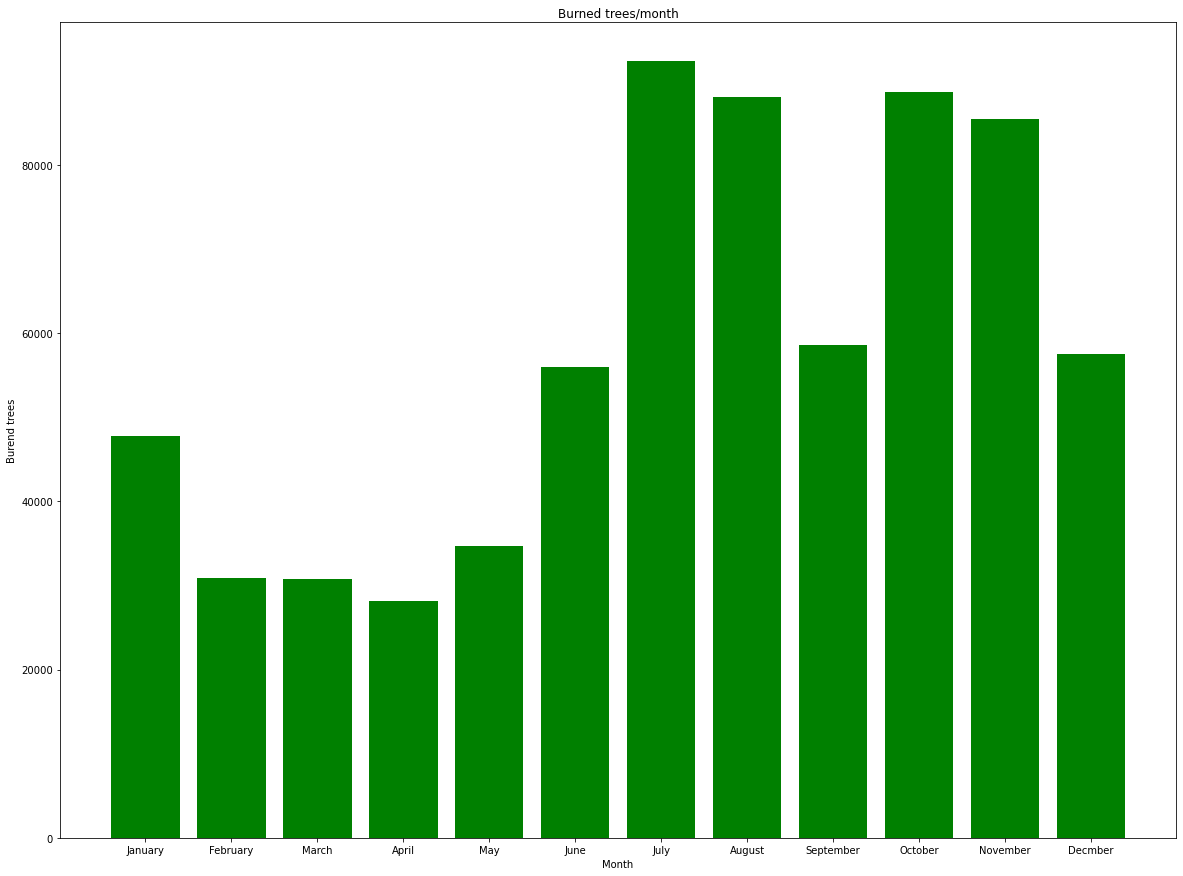

In [6]:
#6. Finally, bar graph the DataFrame found in Question five.
#The bar graph should illustrate the number of forest fires per
#month.

fig, ax = plt.subplots(figsize = (20,15))
plt.xlabel('Month')
plt.ylabel('Burend trees')
plt.title('Burned trees/month')
plt.bar(
    data2.month,
    data2.number,
    color = "Green"
)